# Analysis 1

## Finding out the top 10 reasons for vehicle collisions in New York City from 2015 - 2017(current date) that killed people

In [7]:
import time  #importing the required packages
import requests
import urllib.parse
import json
import os
import pandas

### Starting the analysis by reading the data

In [9]:
from pandas import Series, DataFrame
rawdata = pd.read_csv('ProcessedData\\NYPD_Motor_Vehicle_Collisions.csv') #reading the raw data from vehicle collision dataset
rawdata[:4]

C:\Users\mites\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/04/2017,0:00,BROOKLYN,11206,40.700830,-73.933140,"(40.70083, -73.93314)",EVERGREEN AVENUE,NOLL STREET,NaN,...,NaN,NaN,NaN,NaN,3646753,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,04/04/2017,0:00,BROOKLYN,11221,40.698307,-73.923256,"(40.698307, -73.923256)",NaN,NaN,1353 MYRTLE AVENUE,...,Unspecified,NaN,NaN,NaN,3646754,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
2,04/04/2017,0:00,BROOKLYN,11225,40.663334,-73.960236,"(40.663334, -73.960236)",NaN,NaN,57 EMPIRE BOULEVARD,...,Unspecified,NaN,NaN,NaN,3645240,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,04/04/2017,0:00,MANHATTAN,10002,40.714440,-73.990390,"(40.71444, -73.99039)",NaN,NaN,28 CANAL STREET,...,Unspecified,NaN,NaN,NaN,3645679,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


### Gouping by factors for the collision

In [10]:
newframe = rawdata.groupby(['CONTRIBUTING FACTOR VEHICLE 1'])['NUMBER OF PERSONS KILLED'].count() #grouping by contributing vehicle for collision to the total number of people killed 

In [11]:
plotframe = DataFrame(newframe)

#plotframe
drop = plotframe.drop(plotframe.index[45]) # removing the 'UNSPECIFIED' factor from the dataframe

In [12]:
drop.reset_index()

,CONTRIBUTING FACTOR VEHICLE 1,NUMBER OF PERSONS KILLED
0,Accelerator Defective,430
1,Aggressive Driving/Road Rage,3117
2,Alcohol Involvement,8008
3,Animals Action,520
4,Backing Unsafely,28832
5,Brakes Defective,2550
6,Cell Phone (hand-held),125
7,Cell Phone (hands-free),210
8,Driver Inattention/Distraction,132024
9,Driver Inexperience,12217


In [13]:
drop = drop.rename(columns={'CONTRIBUTING FACTOR VEHICLE 1':'CONTRIBUTING FACTOR','NUMBER OF PERSONS KILLED': 'NUMBER OF PERSONS KILLED'})

In [17]:
pp = drop.sort_values(by='NUMBER OF PERSONS KILLED', ascending=False) #arranging the values in descending order 

In [18]:
zz = pp.head(10).to_csv('factor.csv') #printing few values and putting the values into the CSV file
zz

,NUMBER OF PERSONS KILLED
CONTRIBUTING FACTOR VEHICLE 1,
Driver Inattention/Distraction,132024
Fatigued/Drowsy,48269
Failure to Yield Right-of-Way,44227
Other Vehicular,30880
Backing Unsafely,28832
Turning Improperly,24279
Lost Consciousness,20096
Prescription Medication,15891
Traffic Control Disregarded,12574


### Plotting the graph for top 10 factors

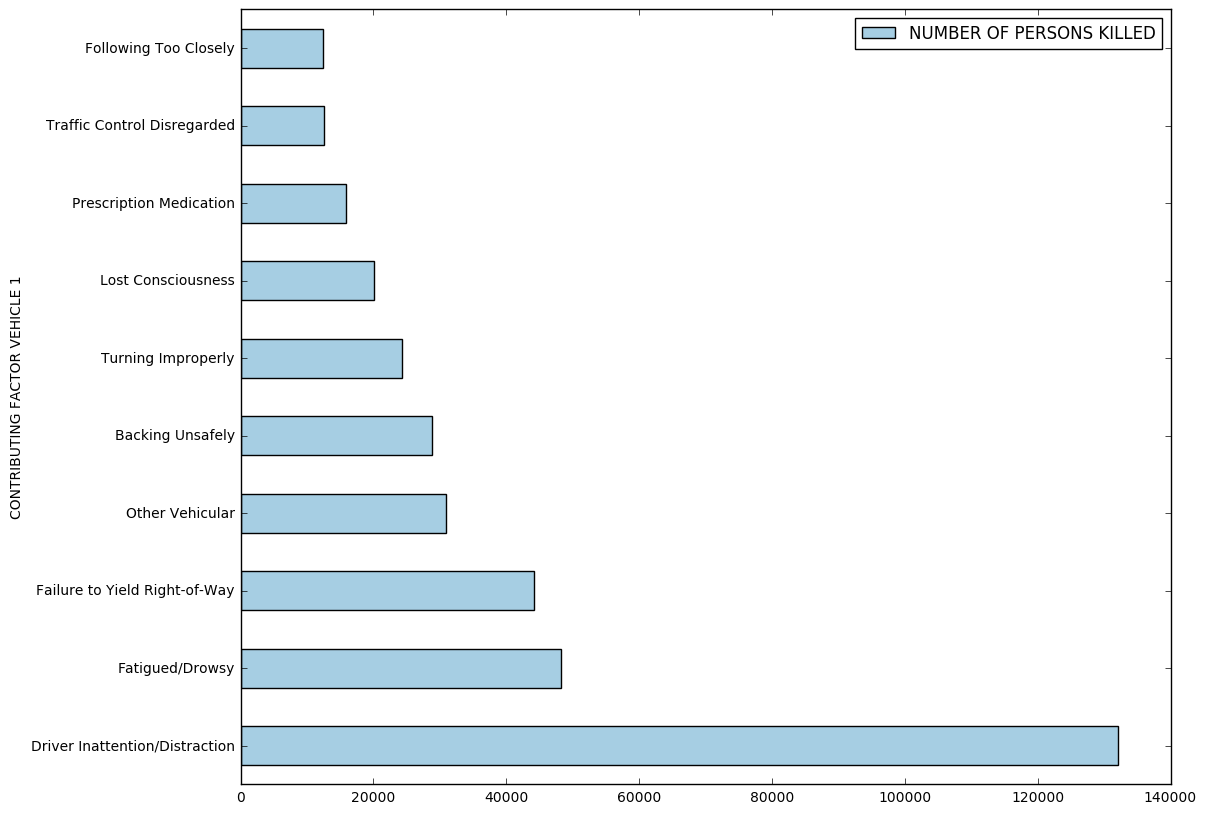

In [10]:
%matplotlib inline
a = zz.plot(kind='barh', colormap='Paired'); #selecting the type of bargraph to display
fig = a.get_figure()
fig.set_size_inches(12, 10)


In [11]:
fig.savefig("factor.png") #saving the plot as PNG image